<a href="https://colab.research.google.com/github/leandroleao2k/ImageML/blob/main/DBSCAN%20Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means Exemplo
K-means vai agrupar os padroes que ele encontrar nos dados 
Dataset gerados randomicamente com sample generator



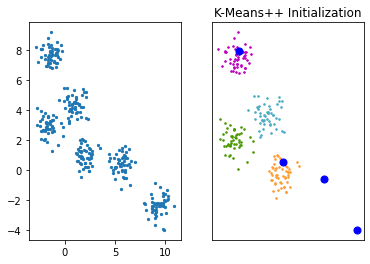

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import kmeans_plusplus
#import pandas as pd

##################
# Carga, onde X sao as variaveis (features) e y é a classe 
X, y_true = make_blobs(n_samples=300, centers=6, cluster_std=0.6, random_state=0)
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], s=5);

# Calculate seeds from kmeans++
centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

# Plot init seeds along side sample data
plt.subplot(1, 2, 2)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

# Exemplo com 6 graficos

10000000 loops, best of 5: 13 ns per loop


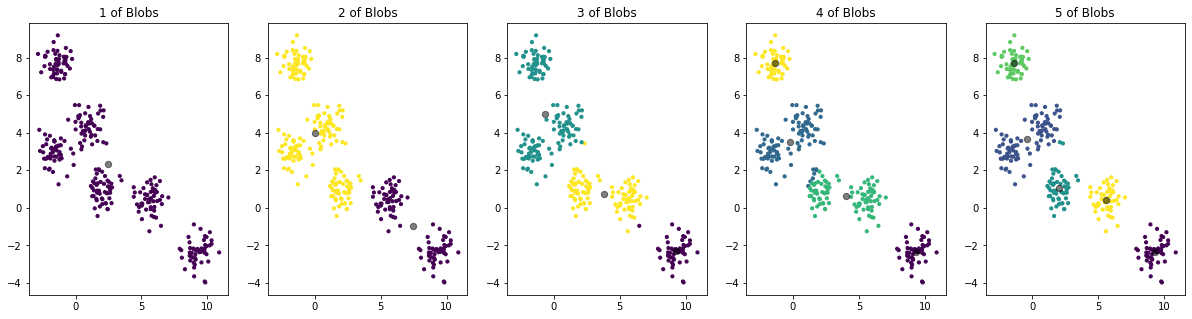

In [19]:
##################
# KMeans com sklearn
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs

#kmeans = KMeans(n_clusters=5, random_state=0)
#y_pred = kmeans.fit_predict(X)
fig = plt.gcf()
fig.set_size_inches(25,5)
%timeit 1
for i in range(1,6):
  plt.subplot(1, 6, i)
  title = str(i) + " of Blobs"
  plt.title(title)
  # kmeans com max 100 iteracoes
  kmeans = KMeans(n_clusters=i, max_iter=10, random_state=1)
  y_pred = kmeans.fit_predict(X)
  plt.scatter(X[:, 0], X[:, 1], s=10,c=y_pred )
  # centroides
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black',s=40, alpha=0.5)
  

# Funcao para treinar DBSCAN e plotar

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

In [22]:
from sklearn.cluster import DBSCAN
def treinar_plotar_DBSCAN(data, epslon=0.5, min_samples=5):
  data_cp = data.copy()
  data_cp.drop (columns='label',inplace = True)

  model = DBSCAN(eps=epslon, min_samples=min_samples)
  model.fit(data_cp)
  
  data_cp['cluster_labels'] = model.labels_
  _ = sns.scatterplot(x='x', y='y', data=data_cp, hue='cluster_labels', palete='rainbow', legend=auto)
  return model.labels_

In [23]:
eps = 0.5
min = 5
labels = treinar_plotar_DBSCAN (X, eps, min)

AttributeError: ignored